In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('medical_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
LE=LabelEncoder()

In [7]:
df['sex']=LE.fit_transform(df['sex'])

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [9]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
df['smoker']=LE.fit_transform(df['smoker'])

In [11]:
df['region']=LE.fit_transform(df['region'])

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
import seaborn as sns

In [14]:
corr=df.corr()

<Axes: >

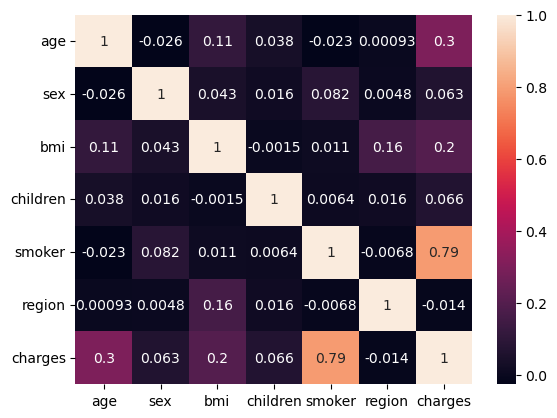

In [15]:
sns.heatmap(corr,annot=True)

In [16]:
df.shape


(2772, 7)

In [17]:
Q1=df.quantile(0.25)

In [18]:
Q3=df.quantile(0.75)

In [19]:
IQR=Q3-Q1

In [20]:
lower_bound=Q1-1.5*IQR

In [21]:
upper_bound=Q3+1.5*IQR

In [22]:
outlier=df[(df>=lower_bound)&(df<=upper_bound)].dropna()

In [23]:
outlier

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,0.0,2,1725.55230
2,28,1,33.000,3,0.0,2,4449.46200
3,33,1,22.705,0,0.0,1,21984.47061
4,32,1,28.880,0,0.0,1,3866.85520
5,31,0,25.740,0,0.0,2,3756.62160
...,...,...,...,...,...,...,...
2766,18,1,23.320,1,0.0,2,1711.02680
2767,47,0,45.320,1,0.0,2,8569.86180
2768,21,0,34.600,0,0.0,3,2020.17700
2770,23,1,18.715,0,0.0,1,21595.38229


In [24]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2,8569.86180
2768,21,0,34.600,0,0,3,2020.17700
2769,19,1,26.030,1,1,1,16450.89470
2770,23,1,18.715,0,0,1,21595.38229


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
LR=LinearRegression()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x=outlier.drop(['charges'],axis=1)

In [29]:
y=outlier['charges']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
LR.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=LR.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
print(mean_squared_error(y_pred,y_test))

22392264.76521307


In [35]:
print(LR.score(x_train,y_train))

0.43244423114916963


In [36]:
print(LR.score(x_test,y_test))

0.3684940099337951


In [37]:
LEdf=LinearRegression()

In [38]:
x=df.drop(['charges'],axis=1)

In [39]:
y=df['charges']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [41]:
LEdf.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred=LEdf.predict(x_test)

In [43]:
print(LEdf.score(x_train,y_train))

0.7535376589689269


In [44]:
print(LEdf.score(x_test,y_test))

0.7442179976912258


In [45]:
def predict_individual_insurance_charge(model):
    """
    Function to predict insurance charges for an individual using a trained linear regression model.

    Parameters:
    - model: Trained linear regression model.

    Returns:
    - predicted_charge: Predicted insurance charge for the individual.
    """
    # Input features one by one
    age = float(input("Enter the person's age: "))
    sex = int(input("Enter the person's sex (0 for female, 1 for male): "))
    bmi = float(input("Enter the person's BMI: "))
    children = int(input("Enter the number of children: "))
    smoker = input("Is the person a smoker? (yes/no): ")
    smoker = 1 if smoker.lower() == 'yes' else 0
    region = input("Enter the person's region (0 for northeast, 1 for northwest, 2 for southeast, 3 for southwest): ")
    region = int(region)  # Convert region to numerical value

    # Make prediction using the model
    predicted_charge = model.predict([[age, sex, bmi, children, smoker, region]])
    
    return predicted_charge[0]


In [52]:
predict_individual_insurance_charge(LEdf)

Enter the person's age: 27
Enter the person's sex (0 for female, 1 for male): 1
Enter the person's BMI: 15
Enter the number of children: 0
Is the person a smoker? (yes/no): no
Enter the person's region (0 for northeast, 1 for northwest, 2 for southeast, 3 for southwest): 0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


186.50919725637868